In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data =  pd.read_csv("dirty_iris.csv")
from ruleset_dirty_iris import *

In [23]:
data = data.replace([np.inf,-np.inf] , np.nan )
# print(data)
# print_full(data)

In [24]:
complete = len(data.dropna())
total = len(data)
print("Percentage of observations that are complete: ",end="")
print(complete/total * 100)

Percentage of observations that are complete: 63.33333333333333


In [25]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
data    

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


In [26]:
data1 = data.replace([np.inf, -np.inf], np.nan)
data1[data1.iloc[:,:4] < 0] = np.nan
data1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


In [27]:
rules = {0 : check_species, 1 : check_positive, 2 : ch_petal_length_twice, 3 : ch_sepal_length_30, 4 :  sepal_longer_petal}
ch_rules = [True] * len(rules)
for i in rules:
    temp = rules[i](data)
    ch_rules[i] = len(temp) - temp.value_counts().at[True]
    print(f'No. of times rule {i} is broken: ', int(ch_rules[i]))

No. of times rule 0 is broken:  0
No. of times rule 1 is broken:  58
No. of times rule 2 is broken:  34
No. of times rule 3 is broken:  12
No. of times rule 4 is broken:  30


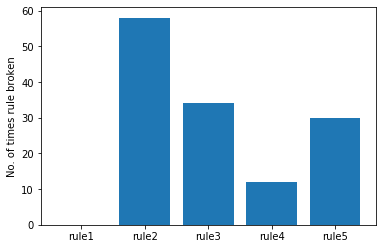

In [29]:
rule = np.array(['rule1', 'rule2', 'rule3', 'rule4', 'rule5'])
plt.bar(rule, ch_rules)
plt.ylabel('No. of times rule broken')
plt.show()